# **Artificial Intelligence Class**
### Group Assignment 
#### Environment Set Up
###### Audrey Njenga, Kelvin Wachira, Edward Okeyo, Ziithe Ewen Hiwa



# Reading and filtering the file using pandas

In [ ]:
import csv
#to read the data file on covid
import pandas as pd


#read file
covidAfrica = pd.read_csv("covid_19_clean_complete.csv")

#To use only African countries we create a filter
covidAfrica.loc[covidAfrica["WHO Region"]=="Africa"]



,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa
24,NaN,Benin,9.3077,2.3158,2020-01-22,0,0,0,0,Africa
31,NaN,Burkina Faso,12.2383,-1.5616,2020-01-22,0,0,0,0,Africa
32,NaN,Cabo Verde,16.5388,-23.0418,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49061,NaN,South Sudan,6.8770,31.3070,2020-07-27,2305,46,1175,1084,Africa
49062,NaN,Western Sahara,24.2155,-12.8858,2020-07-27,10,1,8,1,Africa
49063,NaN,Sao Tome and Principe,0.1864,6.6131,2020-07-27,865,14,734,117,Africa
49065,NaN,Comoros,-11.6455,43.3333,2020-07-27,354,7,328,19,Africa


# Plotting data using matplotlib
## Show the growth rate of confirmed cases in South Africa between June and July 2020





In [ ]:
import matplotlib.pyplot as plt
df = covidAfrica[['Country/Region', 'Confirmed', 'Date']]
#filter data to South Africa
df = df[df['Country/Region'] == 'South Africa']
#filter data to June and July 2020
df['Date'] = pd.to_datetime(df['Date'])
start_date = '2020-06-01'
end_date = '2020-07-31'
mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
df = df.loc[mask]
print(df.head())


      Country/Region  Confirmed       Date
34650   South Africa      35812 2020-06-02
34911   South Africa      37525 2020-06-03
35172   South Africa      40792 2020-06-04
35433   South Africa      43434 2020-06-05
35694   South Africa      45973 2020-06-06


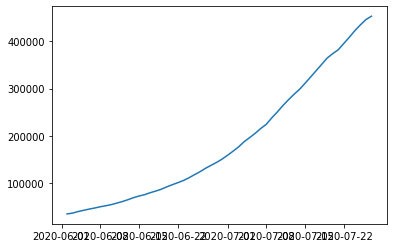

In [ ]:
#set x column as Date and y as confirmed
x =  df['Date']
y = df['Confirmed']
#plot exponential graph
plt.plot(x,y)
plt.show()


# SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering.

In [ ]:
Getting Scipy to form a growth rate formula

In [ ]:
import scipy as sp 
import numpy as np
from scipy import cluster

In [ ]:
#Adding values from a single row
df = pd.DataFrame(covidAfrica,columns=['Confirmed'])

import datetime
#count total confirmed cases
count_column = df.count(axis=0)
print (count_column)

#Take the date time convert it into seconds since 1970 
#perform the initial dat subtract it from the enddate
initialDate =covidAfrica.iloc[0,4]
endDate =covidAfrica.iloc[-1,4]

intdate=str(initialDate)
enddate=str(endDate)

initialarray=intdate.split("-")
endarray=enddate.split("-")

dayone = datetime.datetime(int(initialarray[0]),int(initialarray[1]),int(initialarray[2])).strftime('%s')
lastday = datetime.datetime(int(endarray[0]),int(endarray[1]),int(endarray[2])).strftime('%s')


Periodlength = (int(lastday)-int(dayone))/(60*60*24)
print ("The number of days from first case to last day: "+str(Periodlength))


#Using Scipy to find the lowest possible rate of the spread of covid

# ways to find the rate if you consider 
# newcases/days - variable cases (doubles at the rate of the current cases if it is an exponential growth) = rate per day
# f(x)=x/y-10

def f(x):
    return x/y+x**2

x= np.linspace(0,50000,50)
y = 187

import scipy.optimize as opt
[xopt,fopt,gopt,Bopt, func_calls,grad_calls,warnflg] = \
    opt.fmin_bfgs(f,x0=100,maxiter=50000,full_output=True)




Confirmed    49068
dtype: int64
The number of days from first case to last day: 187.0
Optimization terminated successfully.
         Current function value: -0.000007
         Iterations: 4
         Function evaluations: 21
         Gradient evaluations: 7


**The current function value above represents the function value of the lowest likely rate of spread of the virus**

## Using numpy and SciKit Learn to transfornm data

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# create a radom 10 by 2 array
data = np.random.randint(10, 100, (10 ,2))
# transform features by scaling 
print(data)
scalar = MinMaxScaler()
new = scalar.fit_transform(data)
print(new)

[[15 44]
 [37 17]
 [10 56]
 [98 20]
 [89 50]
 [65 14]
 [58 11]
 [63 54]
 [10 58]
 [76 83]]
[[0.05681818 0.45833333]
 [0.30681818 0.08333333]
 [0.         0.625     ]
 [1.         0.125     ]
 [0.89772727 0.54166667]
 [0.625      0.04166667]
 [0.54545455 0.        ]
 [0.60227273 0.59722222]
 [0.         0.65277778]
 [0.75       1.        ]]


# Using Numpy to find the total of Recovered Cases and converting 

---

numpy array to tensor

In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf

##Monitoring Recovered Cases Using Numpy

#load the dataset
covid_data = pd.read_csv("covid_19_clean_complete.csv")

#filter for Africa
covidAfrica = covid_data.loc[covid_data["WHO Region"]=="Africa"]

covidAfrica

#change the filtered data to a numpy array
covid_array = np.array(covidAfrica[1:])

covid_array

# #slice the array to extract specific row
# covid_array[1,:]

#slice the array to extract recovered cases column
cases = covid_array[:,7]
cases

cases.astype(int)

#Calculate total recovered cases in Africa -sum up column
total = np.sum(cases)

print(total)

# changes recovered cases array into a tensor with tensorflow
tensor = tf.convert_to_tensor(cases, dtype=tf.float32)

print(tensor)

11193730
tf.Tensor([  0.   0.   0. ... 734. 328. 128.], shape=(9023,), dtype=float32)
